# **Интерполирование и экстраполирование функций**

Аппроксимация (приближение) функции – отыскание более простой функции близкой к исходной.

При интерполировании интерполирующая функция строго проходит
через узловые точки таблицы вследствие того, что количество
коэффициентов в интерполирующей функции равно количеству табличных
значений. 

**Задачи:**

1. Требуется найти $x^∗$, которого нет среди известных значений. Можно построить аппроксимирующую функцию $g(x)$, близкую на множестве узлов $x_1…x_n$ к исходной $f(x)$. И вероятно $f(x^∗ )≈g(x^∗ )$.

2. Функция $f(x)$ может быть задана формулой (аналитически)
слишком сложной/тяжёлой для регулярного применения. В
таком случае исходную функцию $f(x)$ также выгодно
заменить аппроксимирующей функцией $g(x)$.

В качестве интерполирующих функций как правило наиболее удобны многочлены. 

$ P_n(x) = b_0 + b_1x + b_2x^2 + ... + b_nx^n $ - вид по канону

In [ ]:
import numpy as np # импортируем библиотеку numpy для продвинутых математических вычислений
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib для визуализации, построения графиков
%matplotlib inline

Аппроксимировать функцию проходящую через 2 точки можно прямой, 3 точки - параболой, 4 точки - кубическим многочленом и т.д.

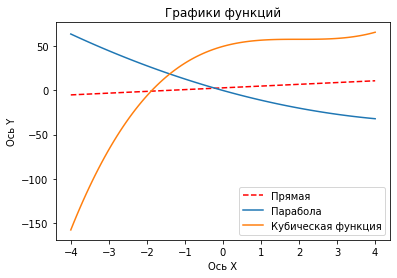

In [ ]:
x = np.linspace(-4, 4, 100)

plt.plot(x, 2*x+3, "r--", label='Прямая')
plt.plot(x, x**2-12*x, label='Парабола')
plt.plot(x, x**3-6*x**2+12*x+50, label='Кубическая функция')

plt.xlabel('Ось X')
plt.ylabel('Ось Y')

plt.title("Графики функций")

plt.legend()

plt.show()

Пусть дана таблица значений функции полученная в результате эксперимента:

$\begin{array}{| c | c | c | c | c | c |} \hline
  \textbf{x}  & x_0 & x_1 & x_2 & x_3 &  x_4 &  x_5    \\ \hline
\textbf{f(x)} &  f(x_0) & f(x_1) &  f(x_2) &  f(x_3) &   f(x_4) &  f(x_5) \\ \hline
\end{array}$


Если значение функции $x$ лежит между узлами интерполяции, то приближённое отыскание значения $f(x)$ называется **интерполированием**.  

Если значение функции $x$ лежит левее или правее узлов интерполяции (за пределами заданного интервала), то приближённое отыскание значения $f(x)$ называется **экстраполированием**.

## **Интерполяционный полином Лагранжа**

Интерполяционный многочлен определяется формулой

### $ L_n(x) = \sum\limits_{i=0}^n
y_i \frac{(x - x_0)(x - x_1) ... (x - x_{i-1})(x - x_{i+1}) ... (x - x_n)}
     {(x_i - x_0)(x_i - x_1) ... (x_i - x_{i-1})(x_i - x_{i+1}) ... (x_i - x_n)} $

т.е., из числителя вычеркивается $(x−x_i)$, а из знаменателя $(x_i−x_i)$

### **Погрешность**

Для оценки погрешности интерполянты можно воспользоваться формулой:



### $ R_n(x) <= \frac{M_{n-1}}{(n+1)!} |(x - x_0)(x - x_1) ... (x - x_n)|$,

где

$ M_{n-1} = 
\max_{x \in [a;b]}
 |f^{(n+1)}(x)| $ - максимальное значение на отрезке интерполяции n+1 производной функции


## **Интерполяционная формула Ньютона**

Интерполяционной формулой Ньютона называется многочлен вида

$ P_n(x) = y_0 + f(x_0;x_1)(x-x_0) + f(x_0;x_1;)(x-x_0)(x-x_1) + ... + f(x_0;x_1;...;x_n)(x-x_0)(x-x_1)...(x-x_n) $


В случае равноотстоящих узлов с шагом h формула приобретает вид

$ P_n(x) = y_0 + \frac{\Delta y_0}{h}(x-x_0) + \frac{\Delta^2 y_0}{2!h^2}(x-x_0)(x-x_1) + ... + \frac{\Delta^n y_0}{n!h^n}(x-x_0)(x-x_1)...(x-x_n) $

$\Delta y_0, \Delta^2 y_0, \Delta^n y_0 $ рассчитываются по формулам:


$\Delta y_0 = y_1 - y_0$

$\Delta^2 y_0 = \Delta y_1 - \Delta y_0$

$\Delta^{n} y_0 = \Delta^{n-1} y_1 - \Delta^{n-1} y_0$

$\begin{array}{| c | c | c | c | c | c |} \hline 
\color{gray}{f(x)} &  \color{gray}{y_0}  &  \color{gray}{y_1}  &  \color{gray}{y_2}  &  \color{gray}{y_3}  &   \color{gray}{y_4}  &  \color{gray}{y_5}   \\ \hline
\color{gray}{f(x)} &  2  &  -3  &  4  &  3  &   5  &  4.5    \\ \hline
\color{gray}{f'(x)} & \color{gray}{\Delta y_0 = y_1-y_0}  &  \color{gray}{\Delta y_1 = y_2-y_1} &  \color{gray}{\Delta y_2 = y_3-y_2} &  \color{gray}{\Delta y_3 = y_4-y_3} &   \color{gray}{\Delta y_4 = y_4-y_5} &   \\ \hline
\color{gray}{f'(x)} &  -5  &  7  &  -1  &  2  &   0.5  &     \\ \hline
\color{gray}{f''(x)} &  \color{gray}{\Delta^2 y_0 = \Delta y_1-\Delta y_0} &  \color{gray}{\Delta^2 y_0 = \Delta y_2- \Delta y_1} &  \color{gray}{\Delta^2 y_0 = \Delta y_3- \Delta y_2} &  \color{gray}{\Delta^2 y_0 = \Delta y_4-\Delta y_3} &    &     \\ \hline
\color{gray}{f''(x)} &  12 &  -8 &  3 &  -1.5 &    &     \\ \hline
\color{gray}{f'''(x)} &  \color{gray}{\Delta^3 y_0 = \Delta^2 y_1-\Delta^2 y_0} &  \color{gray}{\Delta^3 y_0 = \Delta^2 y_2- \Delta^2 y_1} &  \color{gray}{\Delta^3 y_0 = \Delta^2 y_3- \Delta^2 y_2} &  &  &   \\ \hline
\color{gray}{f'''(x)} &  -20 &  11 &  -4.5 &  &  &     \\ \hline
\color{gray}{f''''(x)} &  \color{gray}{\Delta^4 y_0 = \Delta^3 y_1-\Delta^3 y_0} &  \color{gray}{\Delta^4 y_0 = \Delta^3 y_2- \Delta^3 y_1} &  &  &  &   \\ \hline
\color{gray}{f''''(x)} &  31 &  -15.5 &  &  &  &     \\ \hline
\color{gray}{f'''''(x)} &  \color{gray}{\Delta^5 y_0 = \Delta^4 y_1-\Delta^4 y_0} &  &  &  &  &   \\ \hline
\color{gray}{f'''''(x)} &  -46.5 &   &  &  &  &     \\ \hline
\end{array}$


Таким образом формула для 2, 3, 4 узлов примет вид:

$ P_1(x) = y_0 + \frac{\Delta y_0}{h}(x-x_0) $

$ P_2(x) = y_0 + \frac{\Delta y_0}{h}(x-x_0) + \frac{\Delta^2 y_0}{2h^2}(x-x_0)(x-x_1) $

$ P_3(x) = y_0 + \frac{\Delta y_0}{h}(x-x_0) + \frac{\Delta^2 y_0}{2!h^2}(x-x_0)(x-x_1) + \frac{\Delta^3 y_0}{6h^3}(x-x_0)(x-x_1)(x-x_2) $

 ## **Задание**

На основе исходных данных (своего варианта задания) необходимо: 

1) Построить формулу интерполяционного многочлена Лагранжа. Привести к каноническому виду многочлена. 

2) Построить формулу интерполяционного многочлена Ньютона.

3) Построить графики этих функций показывающие зависимость изменения переменных. Добавить подписи данных аналогично **примеру ниже**. Подобрать размеры графика/осей, чтобы все подписи и значения аккурутно вмещались без лишних пустых мест.

4) Используя полученные уравне

ния найти значение функции в точках $x_a = 6$; $x_b = 4.5$. Отметить точки голубым цветом добавив строчку **со своими значениями** на  графике:
```
plt.plot([6,7],[5,4.5],'ro',color='c')
```
Добавить в легенду подпись 'Восстановление значений'



### **Пример ниже**

Даны экспериментальные данные:

$\begin{array}{| c | c | c | c | c | c |} \hline
  \color{gray}{x}  &  0 \hspace{10mm} &   1 \hspace{10mm} &  2 \hspace{10mm} &  3 \hspace{10mm} &   4 \hspace{10mm} &   5 \hspace{10mm}   \\ \hline
\color{gray}{f(x)} &  2 \hspace{10mm} &  -3 \hspace{10mm} &  4 \hspace{10mm} &  3 \hspace{10mm} &   5 \hspace{10mm} &  4.5  \hspace{10mm}   \\ \hline
\end{array}$


Отметим точки на координатном поле и интерполируем прямой крайние точки.

Интерполяционный многочлен Лагранжа примет вид:

$ L_1(x) = y_0 \frac{(x - x_5)}{(x_0 - x_5)}+y_5\frac{(x - x_0)}{(x_5 - x_0)} $

или **$\color{red}{\text{(попробуйте сделать преобразование из одной формы в другую самостоятельно)}}$**

$ L_1(x) = y_0 + (y_5 - y_0)\frac{x - x_0}{x_5 - x_0}$



$ L_1(x) = 2 + (4.5-2)\frac{x - 0}{5 - 0} = 0.5x + 2$




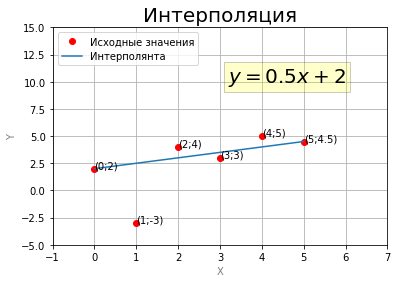

In [ ]:
plt.axis([-1,7, -5,15]) # размеры координатного поля [-1, 7] по x; [-5, 15] по y
plt.title('Интерполяция', fontsize=20) # заголовок
plt.xlabel('X', color='gray') # подписи осей
plt.ylabel('Y',color='gray')
plt.text(0,2,'(0;2)') # подписи точек (текст и его координаты). Можно разместить посимпатичнее/без нахлёста.
plt.text(1,-3,'(1;-3)')
plt.text(2,4,'(2;4)')
plt.text(3,3,'(3;3)')
plt.text(4,5,'(4;5)')
plt.text(5,4.5,'(5;4.5)')
plt.text(3.2, 10, r'$y = 0.5x + 2$', fontsize=20, bbox={'facecolor':'yellow','alpha':0.2})  # координаты, текст, оформление уравнения
plt.grid(True) # сетка
plt.plot([0,1,2,3,4,5],[2,-3,4,3,5,4.5],'ro') # точки кружочками
x = np.linspace(0, 5, 100) # массив равномерно раскинутых точек
y = 0.5*x+2 # значение функции в выше определённых точках
plt.plot(x,y,'-') # заполнить график сплошной линией
plt.legend(['Исходные значения','Интерполянта'], loc=2)  # легенда (обозначение/подпись наборов данных) и её расположение
plt.show() # отобразить результат 

Построим полином для первых 4 точек таблицы:


$ L_3(x) = 
y_0 \frac{(x - x_1)(x - x_2)(x - x_3)}
{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)}
+y_1\frac{(x - x_0)(x - x_2)(x - x_3)}
{(x_1 - x_0)(x_1 - x_2)(x_1 - x_3)}
+y_2\frac{(x - x_0)(x - x_1)(x - x_3)}
{(x_2 - x_0)(x_2 - x_1)(x_2 - x_3)}
+y_3\frac{(x - x_0)(x - x_1)(x - x_2)}
{(x_3 - x_0)(x_3 - x_1)(x_3 - x_2)} $


Осталось подставить известные значения и раскрыть скобки.


$ L_3(x) = 
y_0 \frac{(x - 1)(x - 2)(x - 3)}
{(0 - 1)(0 - 2)(0 - 3)}
+y_1\frac{(x - 0)(x - 2)(x - 3)}
{(1 - 0)(1 - 2)(1 - 3)}
+y_2\frac{(x - 0)(x - 1)(x - 3)}
{(2 - 0)(2 - 1)(2 - 3)}
+y_3\frac{(x - 0)(x - 1)(x - 2)}
{(3 - 0)(3 - 1)(3 - 2)} $

Сначала раскроем скобки в знаменателях:

$ L_3(x) = 
2 \frac{(x - 1)(x - 2)(x - 3)}
{-6}
+(-3)\frac{(x - 0)(x - 2)(x - 3)}
{2}
+4\frac{(x - 0)(x - 1)(x - 3)}
{-2}
+3\frac{(x - 0)(x - 1)(x - 2)}
{6} $



Перейдём к числителям:

$(x - 1)(x - 2)(x - 3) = (x-1)(x^2 - 5x + 6) = (x^3 - 5x^2 + 6x) - (x^2 - 5x + 6) = x^3 - 6x^2 + 11x - 6$

$(x - 0)(x - 2)(x - 3) = x(x^2 - 5x + 6) = x^3 - 5x^2 + 6x$

$(x - 0)(x - 1)(x - 3) = x(x^2 - 4x + 3) = x^3 - 4x^2 + 3x$

$(x - 0)(x - 1)(x - 2) = x(x^2 - 3x + 2) = x^3 - 3x^2 + 2x$

Подставим в уравнение: 

$ L_3(x) = 
2 \frac{x^3 - 6x^2 + 11x - 6}
{-6}
+(-3)\frac{x^3 - 5x^2 + 6x}
{2}
+4\frac{x^3 - 4x^2 + 3x}
{-2}
+3\frac{x^3 - 3x^2 + 2x}
{6} $

**Почти красиво!**

Время избавляться от знаменателей:

$ L_3(x) = 
-\frac{2}{6}(x^3 - 6x^2 + 11x - 6)
-\frac{3}{2}(x^3 - 5x^2 + 6x)
-\frac{4}{2}(x^3 - 4x^2 + 3x)
+\frac{3}{6}(x^3 - 3x^2 + 2x)
 $


$ L_3(x) = 
-\frac{2}{6}(x^3 - 6x^2 + 11x - 6)
-1.5(x^3 - 5x^2 + 6x)
-2(x^3 - 4x^2 + 3x)
+0.5(x^3 - 3x^2 + 2x)
 $

$ L_3(x) = 
-\frac{2}{6}x^3 + \frac{2}{6}*6x^2 -\frac{2}{6}*11x +\frac{2}{6}*6
-1.5x^3 +1.5*5x^2 -1.5*6x
-2x^3 + 2*4x^2 -2*3x
+0.5x^3 - 0.5*3x^2 + 0.5*2x
 $


$ L_3(x) = 
-\frac{2}{6}x^3 + 2x^2 -\frac{22}{6}x + 2
-1.5x^3 +7.5x^2 -9x
-2x^3 + 8x^2 -6x
+0.5x^3 - 1.5x^2 + x
 $

 
$ L_3(x) = 
-\frac{2}{6}x^3 + 2x^2 -\frac{22}{6}x + 2
-3x^3 +14x^2 -14x
 $

Приходим к каноническому виду:

$ L_3(x) = 
-3.333333x^3 + 15x^2 - 17.666666x + 2
 $

Осталось построить график:

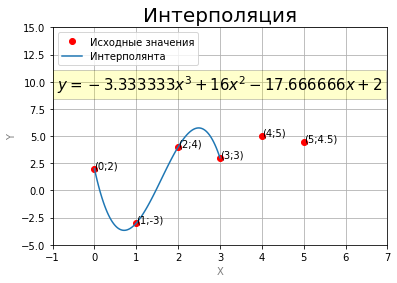

In [ ]:
plt.axis([-1,7, -5,15]) # размеры координатного поля [-1, 7] по x; [-5, 15] по y
plt.title('Интерполяция', fontsize=20) # заголовок
plt.xlabel('X', color='gray') # подписи осей
plt.ylabel('Y',color='gray')
plt.text(0,2,'(0;2)') # подписи точек (текст и его координаты). Можно разместить посимпатичнее/без нахлёста.
plt.text(1,-3,'(1;-3)')
plt.text(2,4,'(2;4)')
plt.text(3,3,'(3;3)')
plt.text(4,5,'(4;5)')
plt.text(5,4.5,'(5;4.5)')
plt.text(-0.9, 9.2, r'$y = -3.333333x^3 + 16x^2 -17.666666x + 2$', fontsize=15, bbox={'facecolor':'yellow','alpha':0.2})  # координаты, текст, оформление уравнения
plt.grid(True) # сетка
plt.plot([0,1,2,3,4,5],[2,-3,4,3,5,4.5],'ro') # точки кружочками
x = np.linspace(0, 3, 100) # массив равномерно раскинутых точек
y = -3.333333*x**3 + 16*x**2 -17.666666*x + 2 # значение функции в выше определённых точках
plt.plot(x,y,'-') # заполнить график сплошной линией
plt.legend(['Исходные значения','Интерполянта'], loc=2)  # легенда (обозначение/подпись наборов данных) и её расположение
plt.show() # отобразить результат 

## **Варианты заданий**

Даны экспериментальные данные:

1) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&2 \hspace{10mm} &-3 \hspace{10mm} &2 \hspace{10mm} &7 \hspace{10mm} &6 \hspace{10mm} &5 \hspace{10mm}  \\ \hline
\end{array}$

2) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&2 \hspace{10mm} &-3 \hspace{10mm} &4 \hspace{10mm} &3 \hspace{10mm} &5 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

3) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&3 \hspace{10mm} &-2 \hspace{10mm} &7 \hspace{10mm} &3 \hspace{10mm} &2.5 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

4) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&1 \hspace{10mm} &-4 \hspace{10mm} &4 \hspace{10mm} &3.5 \hspace{10mm} &5 \hspace{10mm} &5.5 \hspace{10mm}  \\ \hline
\end{array}$

5) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&-2 \hspace{10mm} &-3 \hspace{10mm} &2.4 \hspace{10mm} &1 \hspace{10mm} &6 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

6) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&2 \hspace{10mm} &-2 \hspace{10mm} &4 \hspace{10mm} &4 \hspace{10mm} &5 \hspace{10mm} &2.5 \hspace{10mm}  \\ \hline
\end{array}$

7) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&1 \hspace{10mm} &-2 \hspace{10mm} &7 \hspace{10mm} &3 \hspace{10mm} &3.5 \hspace{10mm} &2.5 \hspace{10mm}  \\ \hline
\end{array}$

8) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&2 \hspace{10mm} &-3 \hspace{10mm} &4 \hspace{10mm} &3 \hspace{10mm} &5 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

9) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&1 \hspace{10mm} &-3 \hspace{10mm} &2 \hspace{10mm} &3 \hspace{10mm} &7 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

10) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&3 \hspace{10mm} &-4 \hspace{10mm} &4 \hspace{10mm} &2 \hspace{10mm} &1 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

11) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&7 \hspace{10mm} &3 \hspace{10mm} &4 \hspace{10mm} &2 \hspace{10mm} &-2 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

12) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&8 \hspace{10mm} &6 \hspace{10mm} &-1 \hspace{10mm} &2 \hspace{10mm} &-2 \hspace{10mm} &4.5 \hspace{10mm}  \\ \hline
\end{array}$

13) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&4 \hspace{10mm} &3 \hspace{10mm} &4 \hspace{10mm} &3 \hspace{10mm} &-1 \hspace{10mm} &2.5 \hspace{10mm}  \\ \hline
\end{array}$

14) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&5 \hspace{10mm} &6 \hspace{10mm} &4 \hspace{10mm} &1 \hspace{10mm} &-3 \hspace{10mm} &5 \hspace{10mm}  \\ \hline
\end{array}$

15) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&4 \hspace{10mm} &2 \hspace{10mm} &4 \hspace{10mm} &4 \hspace{10mm} &-2 \hspace{10mm} &3.5 \hspace{10mm}  \\ \hline
\end{array}$

16) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&8 \hspace{10mm} &2 \hspace{10mm} &5 \hspace{10mm} &3 \hspace{10mm} &-2 \hspace{10mm} &-2.5 \hspace{10mm}  \\ \hline
\end{array}$

17) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&2 \hspace{10mm} &4 \hspace{10mm} &3 \hspace{10mm} &5 \hspace{10mm} &2 \hspace{10mm} &-2 \hspace{10mm}  \\ \hline
\end{array}$

18) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&7 \hspace{10mm} &3 \hspace{10mm} &5.2 \hspace{10mm} &3 \hspace{10mm} &2 \hspace{10mm} &3.5 \hspace{10mm}  \\ \hline
\end{array}$

19) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&8 \hspace{10mm} &2 \hspace{10mm} &5 \hspace{10mm} &3 \hspace{10mm} &-2 \hspace{10mm} &-2.5 \hspace{10mm}  \\ \hline
\end{array}$

20) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&9 \hspace{10mm} &5 \hspace{10mm} &6 \hspace{10mm} &2 \hspace{10mm} &3 \hspace{10mm} &5 \hspace{10mm}  \\ \hline
\end{array}$

21) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&5.4 \hspace{10mm} &2.7 \hspace{10mm} &5.2 \hspace{10mm} &3.6 \hspace{10mm} &2.4 \hspace{10mm} &3.5 \hspace{10mm}  \\ \hline
\end{array}$

22) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&4.4 \hspace{10mm} &3.2 \hspace{10mm} &5 \hspace{10mm} &3.6 \hspace{10mm} &2 \hspace{10mm} &-1 \hspace{10mm}  \\ \hline
\end{array}$

23) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&5 \hspace{10mm} &3 \hspace{10mm} &4 \hspace{10mm} &7 \hspace{10mm} &9 \hspace{10mm} &8 \hspace{10mm}  \\ \hline
\end{array}$

24) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&7.5 \hspace{10mm} &2.5 \hspace{10mm} &5.5 \hspace{10mm} &2 \hspace{10mm} &-3 \hspace{10mm} &4 \hspace{10mm}  \\ \hline
\end{array}$

25) $\begin{array}{| c | c | c | c | c | c |} \hline
\color{gray}{x}&\ 0 \hspace{10mm} &\ 1 \hspace{10mm} &\ 2 \hspace{10mm} &\ 3 \hspace{10mm} &\ 4 \hspace{10mm} &\ 5 \hspace{10mm}  \\ \hline
\color{gray}{f(x)}&-5 \hspace{10mm} &-2 \hspace{10mm} &-4.5 \hspace{10mm} &-3 \hspace{10mm} &-2.8 \hspace{10mm} &-2.5 \hspace{10mm}  \\ \hline
\end{array}$



## **Интеполирование сплайнами**

Полиноминальная интерполяция - не единственно возможный способ интерполяции.
Ещё одним способом является интерполяция сплайнами.

Отличие сплайн-интерполяции от интерполяции полиномом состоит в том, что полином один, а сплайн состоит из нескольких полиномов, а именно их количество равно количеству интервалов, внутри которых происходит интерполирование.

Кубический сплайн записывается в виде:

$ S_i(x) = a_i + b_i(x-x_i) + c_i(x- x_i)^2 + d_i(x-x_i)^3 $

тогда $ S_i(x_i) =a_i, S_{i}^{'}(x_i) =b_i, S_{i}^{''}(x_i) =2c_i $

Обозначим $h_i =x_i-x_{i-1}$

Отсюда получаем формулы для получения коэффициентов сплайна:

$ a_i = f(x_i) $ 

$ d_i = \frac{c_i-c_{i-1}}{3h_i} $


$ b_i = \frac{a_i - a_{i-1}}{h_i} + \frac{2c_i - c_{i-1}}{3}h_i $

$ c_{i-1}h_i + 2c_{i}(h_i + h_{i+1}) + 2c_{i+1}h_{i+1} = 3(\frac{a_{i+1}-a_{i}}{h_{i+1}} - \frac{a_i-a_{i-1}}{h_i}) $

$ c_0 = c_N = 0 $


Даны экспериментальные данные:

$\begin{array}{| c | c | c | c | c | c |} \hline
  \color{gray}{x}  &  0 \hspace{10mm} &   1 \hspace{10mm} &  2 \hspace{10mm} &  3 \hspace{10mm} &   4 \hspace{10mm} &   5 \hspace{10mm}   \\ \hline
\color{gray}{f(x)} &  2 \hspace{10mm} &  -3 \hspace{10mm} &  4 \hspace{10mm} &  3 \hspace{10mm} &   5 \hspace{10mm} &  4.5  \hspace{10mm}   \\ \hline
\end{array}$


Сплайн можно записать в виде системы кубических уравнений:

$
\begin{equation*}
\begin{cases}
   S_0 = a_0 + b_0(x-x_0) + c_0(x- x_0)^2 + d_0(x-x_0)^3\\
   S_1 = a_1 + b_1(x-x_1) + c_1(x- x_1)^2 + d_1(x-x_1)^3\\
   S_2 = a_2 + b_2(x-x_2) + c_2(x- x_2)^2 + d_2(x-x_2)^3\\
   S_3 = a_3 + b_3(x-x_3) + c_3(x- x_3)^2 + d_3(x-x_3)^3\\
   S_4 = a_4 + b_4(x-x_4) + c_4(x- x_4)^2 + d_4(x-x_4)^3\\
 \end{cases}
\end{equation*}
$

### **Метод прогонки**

$ h_i = x_i-x_{i-1} $;
$ l_i = y_i-x_{y-1} $

$ \delta_0 = -h_2/(2(h_1+h_2)) $

$ \lambda_0 = 3(l_2-l_1)/(2(h_1-h_2))$

$ \delta_i = -h_{i+1}/(2h_i+2h_{i+1} + h_i \delta_{i-1}) $

$ \lambda_i = (3l_{i+1} - 3l_i - h_i \lambda_{i-1})/(2h_i+2h_{i+1}+h_{i} \delta_{i-1}))$

Теперь можно переходить к нахождению коэффициентов **с**

$c_i = \delta_i c_{i+1} + \lambda_i $

### **Задание**
Выведите уравнения сплайна. Постройте график.